2020-02-12T13:41:51+01:00

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
torch 1.4.0
POLO not installed

compiler   : Clang 11.0.0 (clang-1100.0.33.16)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit
host name  : fortytwo
Git hash   : c61687207fd6cc953a81d9c8bee0b995ceff4ec3
Git repo   : https://github.com/bicv/POLO/
Git branch : master
800px-Fox_Hunt_1893_Winslow_Homer.jpg
homer.jpg
i05june05_static_street_boston_p1010764.jpeg*
i05june05_static_street_boston_p1010764.npy
i05june05_static_street_boston_p1010785.jpeg*
i05june05_static_street_boston_p1010800.jpeg*
i05june05_static_street_boston_p1010806.jpeg*
i05june05_static_street_boston_p1010808.jpeg*


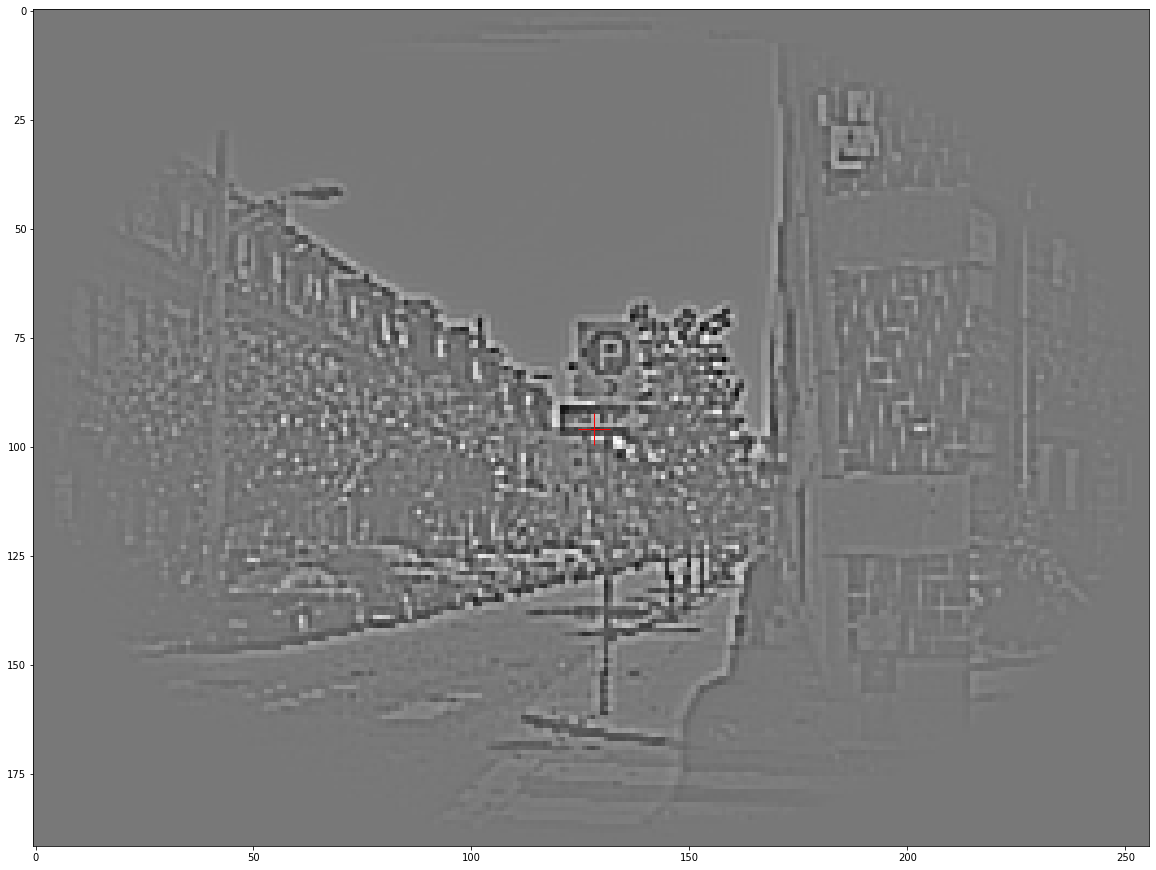

Tensor shape= torch.Size([1, 1, 192, 256])
Tensor shape= torch.Size([1, 1, 96, 128]) , n_levels= 1
Tensor shape= torch.Size([1, 1, 48, 64]) , n_levels= 2
Tensor shape= torch.Size([1, 1, 24, 32]) , n_levels= 3
Tensor shape= torch.Size([1, 3, 32, 32])


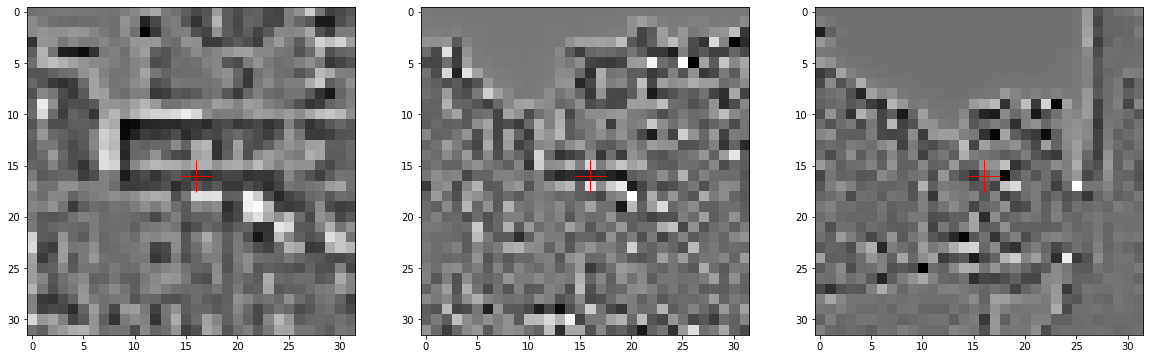

lg shape= 32 32
K shape= (32, 32)
K min max= -0.4102999708906189 1.0


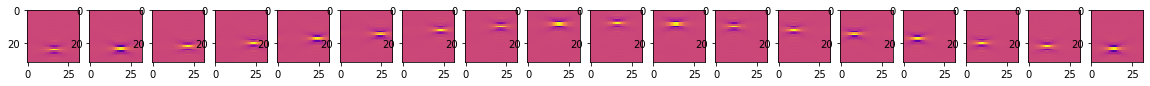

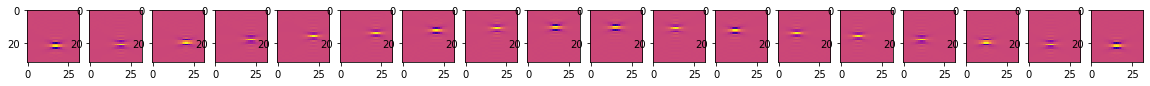

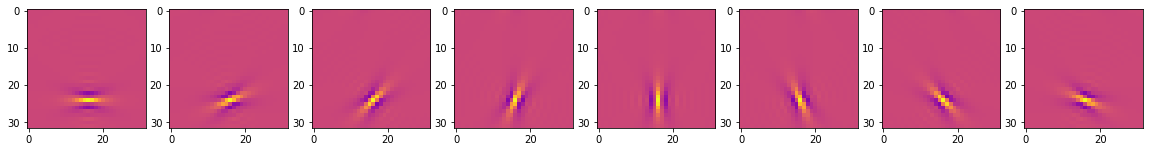

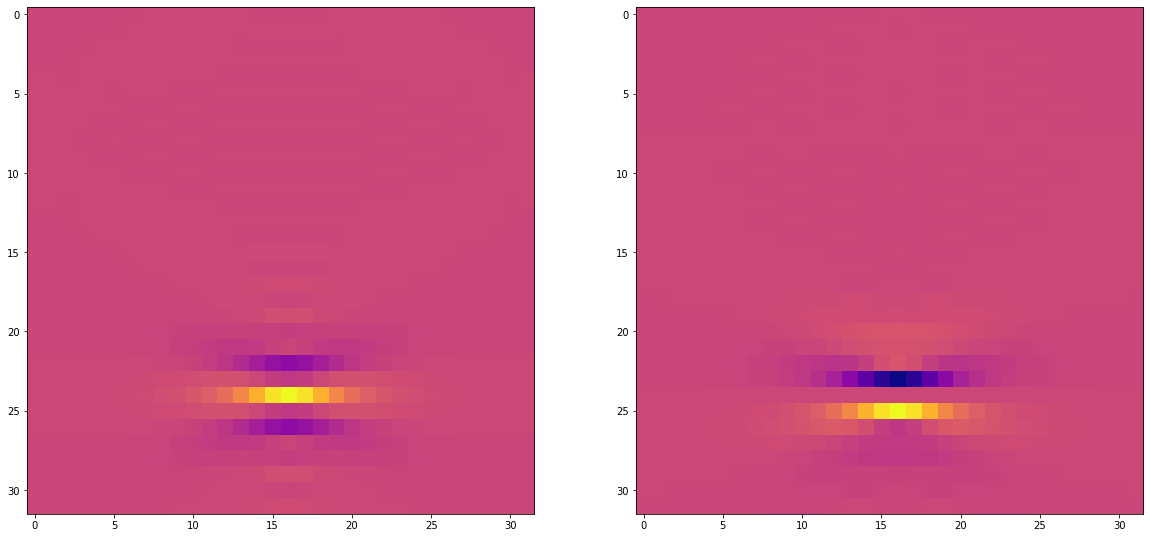

i_sublevel, sf_0, radius 0 0.25 8.0
i_sublevel, sf_0, radius 1 0.3535533905932738 5.65685424949238
K shape= torch.Size([32, 32, 2, 18, 8, 2])
K min max= tensor(-1.) tensor(1.)
Tensor shape= torch.Size([32, 32, 2, 18, 8, 2])
Tensor shape= torch.Size([1, 3, 32, 32])
84.1 µs ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Tensor shape= torch.Size([1, 3, 2, 18, 8, 2])
Tensor shape= torch.Size([1, 3, 32, 32])


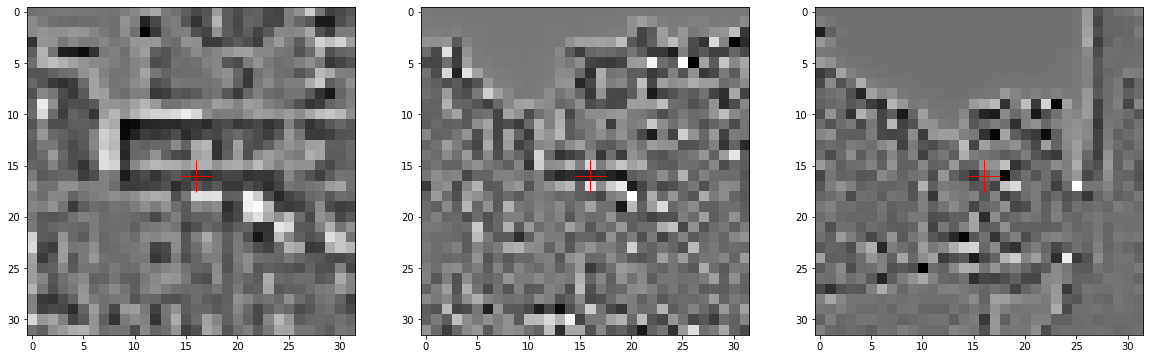

Tensor shape= torch.Size([32, 32, 2, 18, 8, 2])
Tensor shape= torch.Size([1024, 576])
Tensor shape= torch.Size([1, 3, 2, 18, 8, 2])
Tensor shape= torch.Size([1, 3, 576])
Tensor shape= torch.Size([576, 1024])


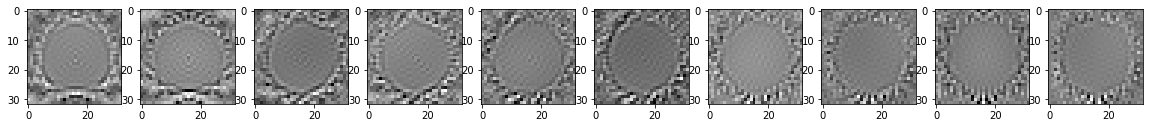

Tensor shape= torch.Size([1, 3, 32, 32])
Tensor shape= torch.Size([1, 3, 32, 32])


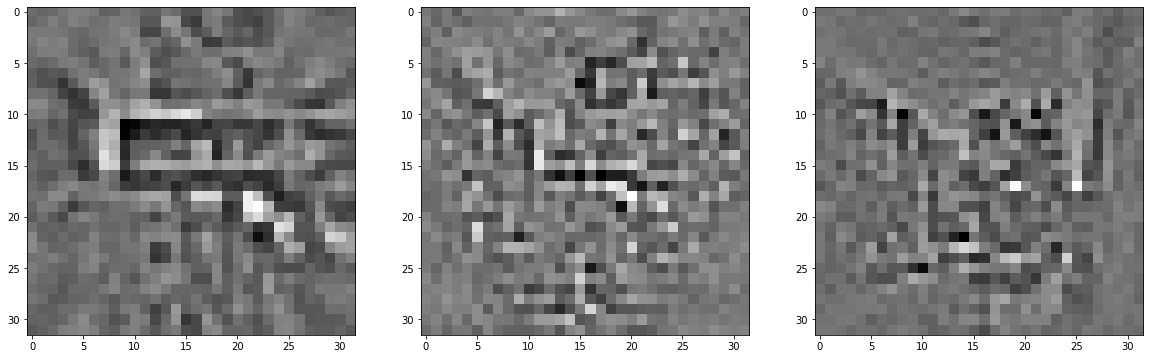

0 torch.Size([1024, 1, 192, 256]) torch.Size([1024, 3, 2, 18, 8, 2])
using cpu


In [1]:
%run 2020-02-11_retina_reconstruction.ipynb

In [2]:
fname = '2020-02-11_retina_reconstruction-SGD'

In [3]:
%rm /tmp/{fname}.pt

In [4]:
try:
    invert = torch.load(f'/tmp/{fname}.pt')
except:
    import time
    n_in, n_out = n_levels*n_sublevel*n_azimuth*n_theta*n_phase, np.prod(img_orig.shape)
    invert = Invert(n_in=n_in, n_out=n_out, verbose=True)

    # set a relative precision required proportional to the mask
    mask_ = im.mask.ravel()
    mask_im = torch.from_numpy(mask_[None, None, :])
    mask_w = torch.from_numpy(mask_[:, None])
    #print(mask_.shape)
    
    def init_weights(m):
        print(m)
        if type(m) == torch.nn.Linear:
            m.weight.data = K.std() * torch.randn_like(m.weight.data) * (mask_w * torch.ones((1, n_in)))
    invert.KT.apply(init_weights)

    #optimizer = torch.optim.SGD(params, lr=lr)
    optimizer = torch.optim.SGD(invert.parameters(), lr=lr, 
                                momentum=.9, dampening=0, nesterov=True, 
                                weight_decay=0.01)
    criterion = torch.nn.MSELoss() 

    # ----------
    #  Training
    # ----------
    loss_0 = None
    invert.train()
    for epoch in range(n_epochs):
        t_batch = time.time()
        for batch_idx, (target, x) in enumerate(dataloader):
            target = target.squeeze(1)
            target = target.reshape((target.shape[0], target.shape[1]*target.shape[2]))
            x = x.reshape((target.shape[0], n_levels*n_sublevel*n_azimuth*n_theta*n_phase))

            target, x = target.to(device), x.to(device)

            optimizer.zero_grad()
            im_rec = invert(x)
            if loss_0 is None:
                loss_0 = criterion(target, torch.zeros_like(target))
            loss = criterion(target, im_rec) / loss_0
            #loss = criterion(target*mask_im, im_rec*mask_im) / loss_0
            loss.backward()
            optimizer.step()

        print("[Epoch %d/%d][loss: %f] [Time: %fs]" % (epoch+1, n_epochs, loss.item(), time.time()-t_batch))

    invert.eval()
    torch.save(invert, f'/tmp/{fname}.pt')

n_in, n_out= 1728 49152
Linear(in_features=1728, out_features=49152, bias=False)
[Epoch 1/100][loss: 71.801266] [Time: 9.757114s]
[Epoch 2/100][loss: 71.569041] [Time: 7.524256s]
[Epoch 3/100][loss: 71.239107] [Time: 5.381993s]
[Epoch 4/100][loss: 70.822545] [Time: 7.295024s]
[Epoch 5/100][loss: 70.329570] [Time: 7.638385s]
[Epoch 6/100][loss: 69.769566] [Time: 9.188419s]
[Epoch 7/100][loss: 69.151117] [Time: 9.920674s]
[Epoch 8/100][loss: 68.482057] [Time: 6.376007s]
[Epoch 9/100][loss: 67.769509] [Time: 11.187698s]
[Epoch 10/100][loss: 67.019938] [Time: 8.943050s]
[Epoch 11/100][loss: 66.239187] [Time: 8.424755s]
[Epoch 12/100][loss: 65.432534] [Time: 9.948353s]
[Epoch 13/100][loss: 64.604724] [Time: 10.959573s]
[Epoch 14/100][loss: 63.760023] [Time: 7.856570s]
[Epoch 15/100][loss: 62.902246] [Time: 6.517285s]
[Epoch 16/100][loss: 62.034806] [Time: 5.302184s]
[Epoch 17/100][loss: 61.160741] [Time: 4.535707s]
[Epoch 18/100][loss: 60.282751] [Time: 3.835296s]
[Epoch 19/100][loss: 59.40

## reconstructing one image

In [5]:
for batch_idx, (target, x) in enumerate(dataloader):
    print(batch_idx, target.shape, x.shape)

0 torch.Size([1024, 1, 192, 256]) torch.Size([1024, 3, 2, 18, 8, 2])


In [6]:
i_target = 0
img_tens = target[i_target, :].reshape(img_orig.shape)
x_target = x[i_target, :]
#print('x_target.shape', x_target.shape)
# x_target = torch.tensordot(cropped_pyramid(target[i_target, :].reshape(img_orig.shape)[None, None, ...]), K, dims=2)
x_target = x_target.reshape((1, n_levels*n_sublevel*n_azimuth*n_theta*n_phase))
#print('x_target.shape', x_target.shape)
im_rec = invert(x_target).reshape(img_tens.shape)
#print('im_rec.shape', im_rec.shape)

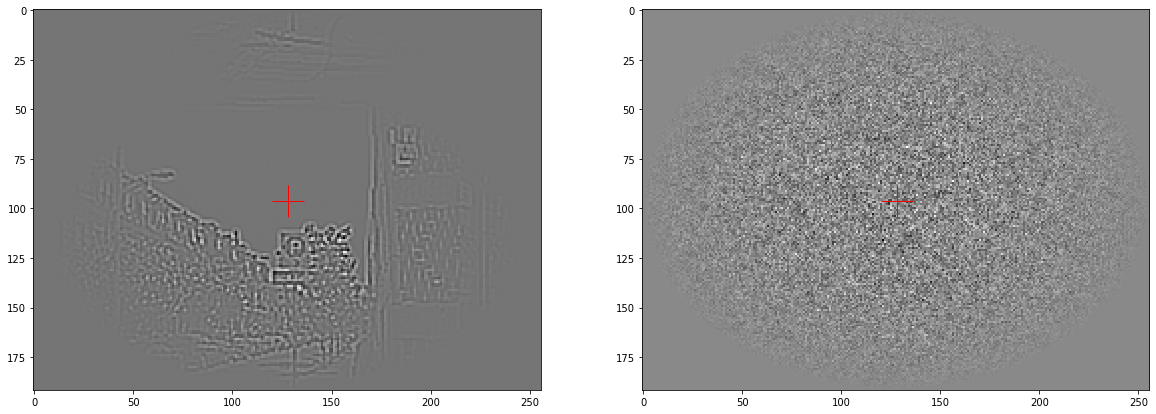

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(20,20))
for ax, img in zip(axs, [img_tens, im_rec.detach()]):
    ax.imshow(img.numpy(), cmap='gray')
    ax.plot([img_orig.shape[1]/2], [img_orig.shape[0]/2], 'r+', ms=32);

## validating on the test set

In [8]:
test_dataloader = get_dataloader(img_orig, 1, verbose=False)
for batch_idx, (target, x) in enumerate(test_dataloader):
    print(batch_idx, target.shape, x.shape)

0 torch.Size([1, 1, 192, 256]) torch.Size([1, 3, 2, 18, 8, 2])


In [9]:
i_target = 0
img_tens = target[i_target, :].reshape(img_orig.shape)
x_target = x[i_target, :].reshape((1, n_levels*n_sublevel*n_azimuth*n_theta*n_phase))
im_rec = invert(x_target).reshape(img_tens.shape)

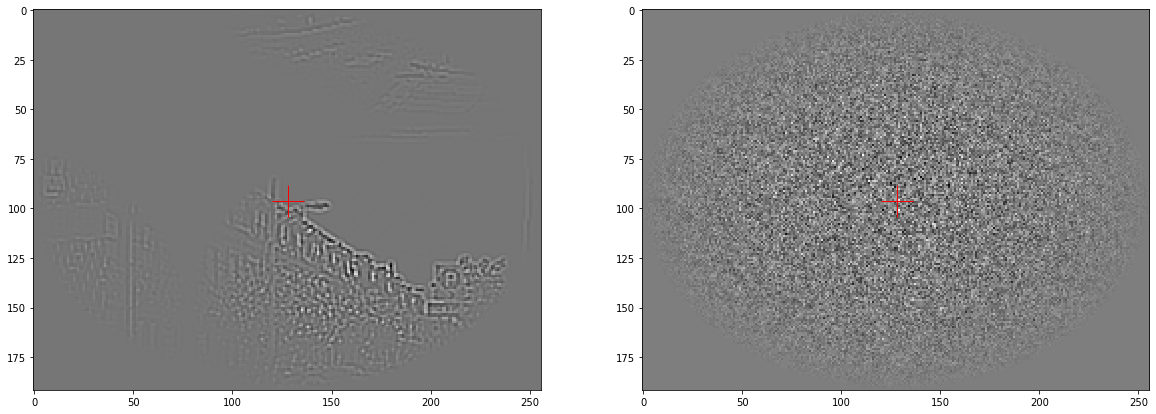

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(20,20))
for ax, img in zip(axs, [img_tens, im_rec.detach()]):
    ax.imshow(img.numpy(), cmap='gray')
    ax.plot([img_orig.shape[1]/2], [img_orig.shape[0]/2], 'r+', ms=32);

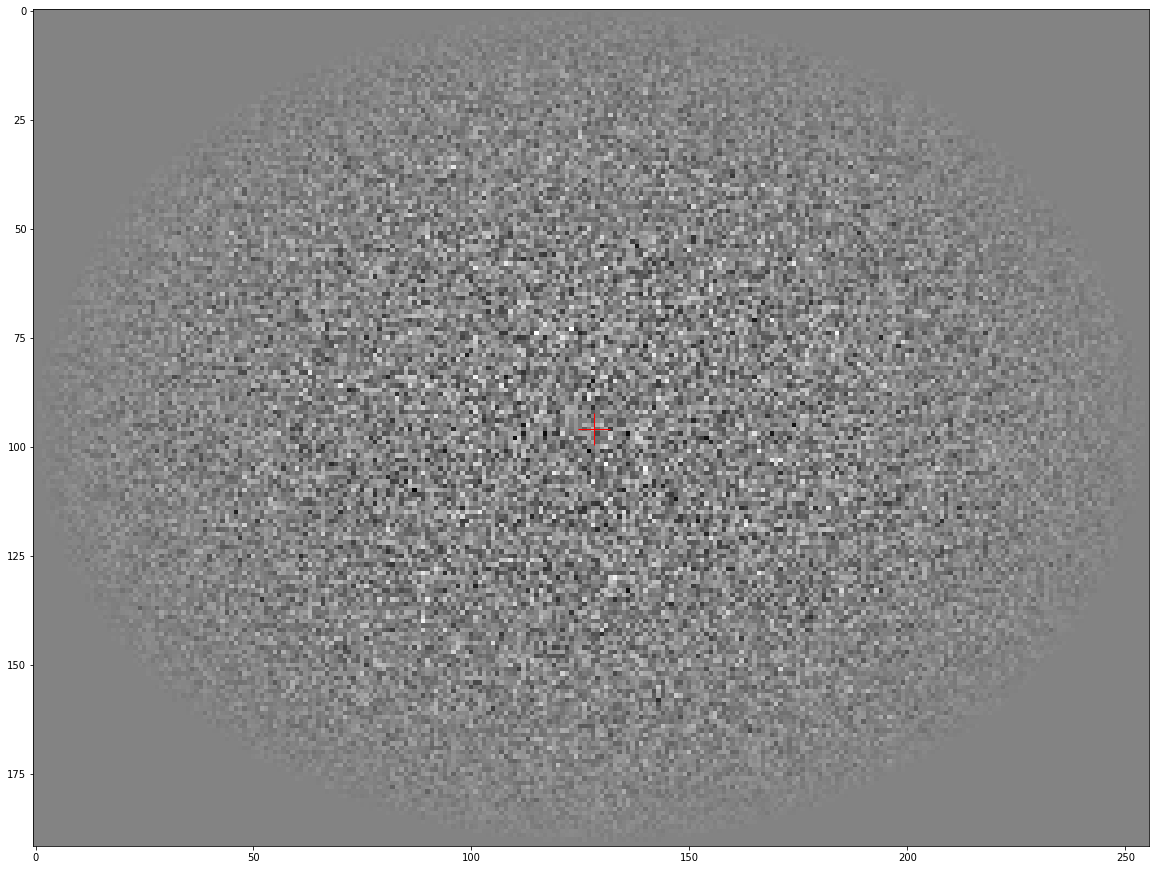

In [11]:
i_filter = 352
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(invert.KT.weight.data[0:, i_filter].detach().numpy().reshape(img_orig.shape), cmap='gray')
ax.plot([img_orig.shape[1]/2], [img_orig.shape[0]/2], 'r+', ms=32);